<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 7: Descomposicion en valores propios</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

## Tabla de Contenidos
1. [**Tutorial:** Ejemplo: Calculo de valores propios](#Ejemplo:-Calculo-de-valores-propios)
2. [**Tutorial:** Ejemplo: Calculo de valores propios matrices sparse](#Ejemplo:-Calculo-de-valores-propios-2)
3. [**Tutorial:** Ejemplo: PageRank](#Ejemplo:-PageRank) 

In [1]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))
np.set_printoptions(precision=4)
import scipy.linalg as LA
import scipy.sparse.linalg as sLA

## Ejemplo: Calculo de valores propios

Calculo con funcion general ``scipy.linal.eig`` y para matrices simetricas``scipy.linalg.eigh``

In [2]:
A = np.array([[3,1],[1,3]], dtype=np.float64)
lamb, V = LA.eigh(A);Vinv = np.linalg.inv(V)

lamb1, V1 = LA.eig(A);V1inv = np.linalg.inv(V1)
print(f"chequeando si es diagonalizable: {np.linalg.norm(A - V@(np.diag(lamb))@Vinv) }")
print(f"chequeando si es diagonalizable: {np.linalg.norm(A - V1@(np.diag(lamb1))@V1inv) }")

chequeando si es diagonalizable: 0.0
chequeando si es diagonalizable: 0.0


In [3]:
B = np.array([[1,1],[0,1]])
# B = np.array([[1,1,0],[0,1,1],[0,0,1]], dtype=np.float64)
lamb, V = LA.eig(B)
Vinv = np.linalg.inv(V)
print(f"chequeando si es diagonalizable: {np.linalg.norm(B - V@(np.diag(lamb))@Vinv) }")

print(f"chequeando valore y vector propio: { np.linalg.norm(A.dot(V[:,0] - lamb[0]*V[:,0]))}")


chequeando si es diagonalizable: 1.0
chequeando valore y vector propio: 0.0


## Ejemplo: Calculo de valores propios 2

Calculo par Matrices sparse y grandes ``scipy.sparse.linalg.eigs``y para matrices simetricas ``scipy.sparse.linalg.eigsh``

In [4]:
def Matrizdediferencias(n):
    Dn = np.zeros((n-1,n))
    for i in range(n-1):
        Dn[i,i] = -1.0
        Dn[i,i+1] = 1.0
    return Dn

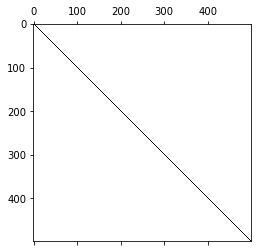

In [5]:
n=501
Dn = Matrizdediferencias(n)
Dnm1 = Matrizdediferencias(n-1)
Delta = -(n-1)**2*Dnm1.dot(Dn)
plt.spy(Delta[:,1:n-1])
plt.show()

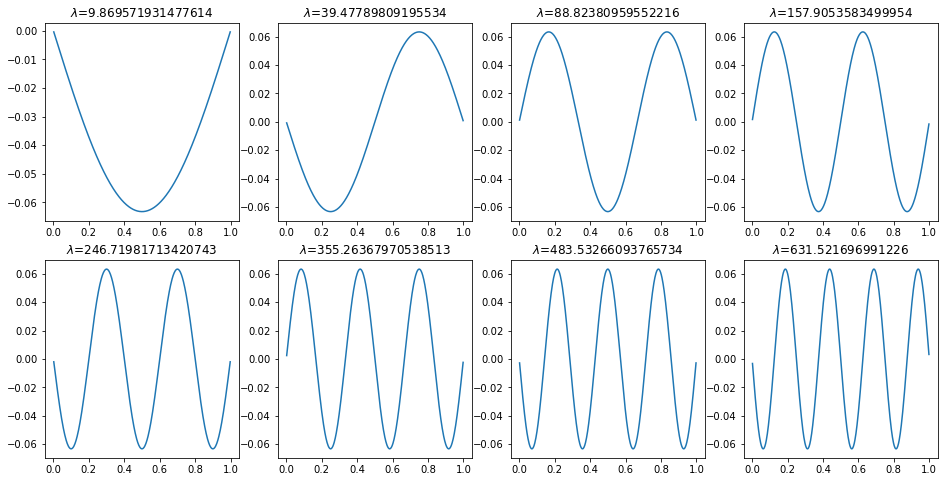

In [6]:
eigenval, V = sLA.eigsh(Delta[:,1:n-1], k=10, which='SM')
t = np.array([ i/(n-1) for i in range(n)])

figplots, axplots = plt.subplots(2,4, figsize=(16,8))
for j, axp in enumerate(figplots.axes):
    axp.plot(t[1:n-1], V[:,j])
    axp.title.set_text(r'$\lambda$=' + str(eigenval[j]))
plt.show()

## Ejemplo: PageRank
$$
A =
\begin{bmatrix}
0 & 0 & 1 & 1/2 \\ 1/3 & 0 & 0 & 0 \\ 1/3 & 1/2 & 0 & 1/2 \\ 1/3 & 1/2 & 0 & 0
\end{bmatrix}
$$

In [7]:
A = np.array([[0,0,1,1/2],[1/3,0,0,0],[1/3,1/2,0,1/2],[1/3,1/2,0,0]])

valores_propios, vectores_propios = sLA.eigs(A)
lam = valores_propios[0].real
x = (vectores_propios[:,0]).real
print("valor propio :", lam)
print("vector propio:", x)


valor propio : 1.000000000000002
vector propio: [0.721  0.2403 0.5408 0.3605]


In [8]:
def iteracion_de_potencia(A, x=None, MAXITER=100, TOL=1e-8):
    n = A.shape[0]
    # Inicializamos un vector aleatorio si no es dado
    if x is None: x = np.random.rand(n)
    # Calculamos el autovalor aproximado
    eigenvalue = np.dot(np.dot(A, x), x) / np.dot(x, x)
    Ax = np.dot(A, x)
    
    niter=0
    while niter<MAXITER and np.linalg.norm(Ax - eigenvalue * x) > TOL:
        # Calculamos la norma del vector Ax
        norm = np.linalg.norm(Ax, 2)
        
        # Normalizamos el vector x
        x = Ax / norm
        # Multiplicamos la matriz A por el vector x
        Ax = np.dot(A, x)
        # Calculamos el autovalor aproximado
        eigenvalue = np.dot(np.dot(A, x), x) / np.dot(x, x)
        niter+=1
    return eigenvalue, x, niter

# Ejemplo de uso
A= np.array([[4, -1, 2], [2, 1, 6], [-1, 2, 3]])
eigenvalue, eigenvector, niter = iteracion_de_potencia(A)

print("Autovalor aproximado:", eigenvalue)
print("Vector propio asociado:", eigenvector)


Autovalor aproximado: 5.578020630311125
Vector propio asociado: [0.1898 0.81   0.5548]


In [9]:
A = np.array([[0,0,1,1/2],[1/3,0,0,0],[1/3,1/2,0,1/2],[1/3,1/2,0,0]])
eigenvalue, eigenvector, niter = iteracion_de_potencia(A, MAXITER=10000)
print("Autovalor aproximado:", eigenvalue)
print("Vector propio asociado:", eigenvector)
print("numero de iteracion :", niter)

Autovalor aproximado: 0.9999999980956542
Vector propio asociado: [0.721  0.2403 0.5408 0.3605]
numero de iteracion : 31
